<a href="https://colab.research.google.com/github/lokilokesh007/CreditCardFraudDetection-Python/blob/main/CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [ ]:
#loading the dataset
dataset=pd.read_csv('/content/creditcard.csv')

In [ ]:
#last five rows of the data
dataset.tail()
#class particular transcation is normal(0) or fradulent(1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
3968,3617,1.134592,0.252051,0.488592,0.799826,-0.264819,-0.369918,-0.243365,0.049761,1.210818,...,-0.351115,-0.851463,0.186169,0.092463,0.020015,0.057976,-0.046611,0.012562,13.99,0.0
3969,3621,-1.338671,1.080974,1.291196,0.719258,0.101320,0.053896,0.001297,-0.917575,1.638510,...,0.498030,-0.483932,0.037686,0.053566,-0.560078,0.230423,-0.119911,0.321847,27.43,0.0
3970,3622,-0.339728,-2.417449,0.975517,2.537995,-1.720361,0.863005,0.032965,0.026764,2.487139,...,0.391639,0.264432,-0.735031,0.450594,0.310022,-0.231357,-0.049872,0.153526,730.32,0.0
3971,3623,-0.368639,0.947432,1.707755,0.932092,0.292956,0.189100,0.499330,0.132466,0.779412,...,-0.119045,0.056665,-0.172703,0.170073,0.139605,-0.420518,0.033794,0.005996,6.87,0.0
3972,3624,-0.663445,1.162921,1.508050,0.549405,0.231377,-0.106041,0.817977,-0.387026,1.488054,...,-0.420337,-0.361357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Time = The particular transaction in seconds
# v1, v2,... = principle component analaysis method is used to convert the features ie v1, v2, v3 into numerical values since the creadit card features are much sensitive
#Amount = The amount credited
#class = the class defines wheather the transaction is ligit-real(0) and fradulent(1)

In [ ]:
#to know the information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3973 entries, 0 to 3972
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    3973 non-null   int64  
 1   V1      3973 non-null   float64
 2   V2      3973 non-null   float64
 3   V3      3973 non-null   float64
 4   V4      3973 non-null   float64
 5   V5      3973 non-null   float64
 6   V6      3973 non-null   float64
 7   V7      3973 non-null   float64
 8   V8      3973 non-null   float64
 9   V9      3973 non-null   float64
 10  V10     3973 non-null   float64
 11  V11     3973 non-null   float64
 12  V12     3973 non-null   float64
 13  V13     3973 non-null   float64
 14  V14     3973 non-null   float64
 15  V15     3973 non-null   float64
 16  V16     3973 non-null   float64
 17  V17     3973 non-null   float64
 18  V18     3973 non-null   float64
 19  V19     3973 non-null   float64
 20  V20     3973 non-null   float64
 21  V21     3973 non-null   float64
 22  

In [ ]:
#to check the number of misssing values in each column
dataset.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


<ipython-input-8-01c574798170>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset.V26)


<Axes: xlabel='V26', ylabel='Density'>

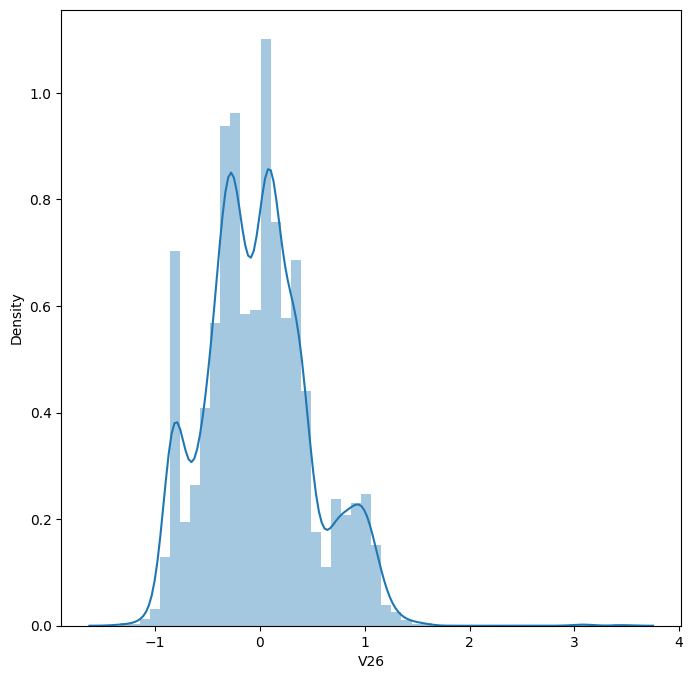

In [ ]:
#handling the missing value

#before handling we have to analyse the distribution of data
fig, ax=plt.subplots(figsize=(8,8))
sns.distplot(dataset.V26)

In [ ]:
#replacing the missing values with median values
dataset['V26'].fillna(dataset['V26'].median(),inplace=True)
dataset['V27'].fillna(dataset['V27'].median(),inplace=True)
dataset['V28'].fillna(dataset['V28'].median(),inplace=True)
dataset['Amount'].fillna(dataset['Amount'].median(),inplace=True)
dataset['Class'].fillna(dataset['Class'].median(),inplace=True)

#droppig the rows in a datset
#newdataset=dataset.dropna(how='any')

In [ ]:
#to check the number of misssing values in each column
dataset.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
#distribution of ligit transactions and fradulent transactions
dataset['Class'].value_counts()

,count
Class,
0.0,3971
1.0,2


Here, the no of datapoints are more for ligit so if we feed to the ml model beacuse then it cannot recognise the fradulent transactions beacuse we have very much less points to the fradulent.

 that is the the reason the data is unbalanced

The Dataset has highly unbalanced data

0--> Normal Transactions
1--> Fradulent Transactions

In [ ]:
#seperating the data for analysis
legit=dataset[dataset.Class==0]
fraud=dataset[dataset.Class==1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(3971, 31)
(2, 31)


In [ ]:
#statistical analysis of the data

legit.Amount.describe()

,Amount
count,3971.000000
mean,64.886525
std,213.587253
min,0.000000
25%,2.270000
50%,12.990000
75%,54.990000
max,7712.430000


In [ ]:
fraud.Amount.describe()

,Amount
count,2.000000
mean,264.500000
std,374.059487
min,0.000000
25%,132.250000
50%,264.500000
75%,396.750000
max,529.000000


In [ ]:
#Compare the values for both transactions (it mean)
dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,1639.328381,-0.332543,0.309150,0.837615,0.011568,-0.029403,0.053490,0.147526,-0.071721,0.056572,...,0.059639,0.010174,-0.083028,-0.058743,0.029114,0.095244,-0.012640,0.044655,0.002672,64.886525
1.0,439.000000,-2.677884,-0.602658,-0.260694,3.143275,0.418809,-1.245684,-1.105907,0.661932,-1.520521,...,1.114625,0.589464,0.200214,0.455377,0.013198,0.162159,0.016239,0.004186,-0.053756,264.500000


UNDER-SAMPLING

Build a sample dataset containing similer distrubution of normal transactions


Number of fradulent transaction-->492

In [ ]:
legit_sample=legit.sample(n=492)

concatinating two dataframes

In [ ]:
new_dataset=pd.concat([legit_sample,fraud],axis=0)

In [ ]:
new_dataset.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
3932,3534,-1.567249,1.114412,0.857192,0.307371,-0.681452,-0.850166,-0.241827,0.883800,-0.121800,...,-0.092519,-0.431668,-0.111279,0.391207,-0.042228,0.231544,-0.049162,-0.016728,4.91,0.0
678,513,1.295949,0.136054,0.383682,-0.079325,-0.497416,-1.120717,0.075887,-0.316257,0.039229,...,-0.092651,-0.185626,0.027576,0.496765,0.287257,0.955182,-0.075089,0.007082,4.69,0.0
1523,1191,0.970661,-0.316853,1.167245,1.764797,-0.734597,0.628086,-0.437141,0.252002,1.196801,...,-0.377612,-0.723429,0.030925,0.093137,0.415758,-0.516817,0.082683,0.039292,67.23,0.0
3945,3562,0.763766,-0.779865,1.602228,1.346287,-0.896804,1.949052,-1.303501,0.871121,1.462470,...,0.345170,1.180964,0.005787,-0.640357,0.032097,-0.084282,0.146088,0.041346,86.06,0.0
3939,3545,-1.452465,1.090000,1.687641,1.577140,-0.138990,0.100041,0.418148,0.606456,-0.691840,...,-0.237336,-0.989429,-0.210181,-0.212569,0.380793,-0.232364,-0.214213,-0.045794,60.38,0.0


In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,1635.878049,-0.335675,0.304989,0.880348,-0.015682,-0.102191,0.022142,0.163615,0.014081,0.069361,...,0.059063,0.003362,-0.047171,-0.072287,0.001276,0.069215,-0.034964,0.056055,-0.012247,64.537215
1.0,439.000000,-2.677884,-0.602658,-0.260694,3.143275,0.418809,-1.245684,-1.105907,0.661932,-1.520521,...,1.114625,0.589464,0.200214,0.455377,0.013198,0.162159,0.016239,0.004186,-0.053756,264.500000


splitting the data into Features And Targets

In [ ]:
X=new_dataset.drop(columns='Class',axis=1)
Y=new_dataset['Class']

In [ ]:
print(X)

      Time        V1        V2        V3        V4        V5        V6  \
3932  3534 -1.567249  1.114412  0.857192  0.307371 -0.681452 -0.850166   
678    513  1.295949  0.136054  0.383682 -0.079325 -0.497416 -1.120717   
1523  1191  0.970661 -0.316853  1.167245  1.764797 -0.734597  0.628086   
3945  3562  0.763766 -0.779865  1.602228  1.346287 -0.896804  1.949052   
3939  3545 -1.452465  1.090000  1.687641  1.577140 -0.138990  0.100041   
...    ...       ...       ...       ...       ...       ...       ...   
3116  2683 -0.531358  1.787856 -0.656798  0.664208  0.388265 -0.736126   
3573  3053 -2.778091 -0.091808  1.528881  3.183444 -1.092386  0.335574   
1746  1352  1.299268  0.353624 -0.152563  0.779754  0.432925 -0.104665   
541    406 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623    472 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   

            V7        V8        V9  ...       V20       V21       V22  \
3932 -0.241827  0.883800 -0.121800  ..

In [ ]:
print(Y)

3932    0.0
678     0.0
1523    0.0
3945    0.0
3939    0.0
       ... 
3116    0.0
3573    0.0
1746    0.0
541     1.0
623     1.0
Name: Class, Length: 494, dtype: float64


split the data into training data and testing data

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(494, 30) (395, 30) (99, 30)


ModelTraining

In [ ]:
LogisticRegression

sklearn.linear_model._logistic.LogisticRegression

In [ ]:
model=LogisticRegression()

In [ ]:
#traing the logistic regresion model with training data
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

Accuracy score

In [ ]:
#accuracy on training data
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
print("Accuracy on training data",training_data_accuracy)

Accuracy on training data 1.0


In [ ]:
#accuracy on test data
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
print("Accuracy on test data",test_data_accuracy)

Accuracy on test data 1.0
